## Projet Manipulation image

## Valeurs de couleurs
R ( 8 bits) intensite pour la couleur rouge
G ( 8 bits) intensite pour la couleur verte
B ( 8 bits ) intensite pour la couleur bleu
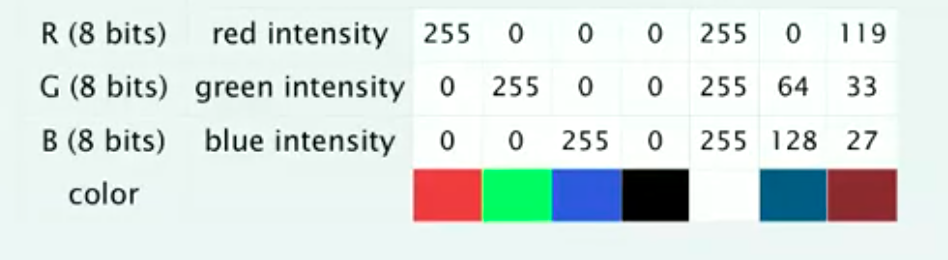

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

In [96]:
## Creer votre propre Type de données abstrait Couleur sous python avec les caractériistiques suivants:
class Couleur:
    
    '''
    Constructeur à 3 paramétres qui represente les valeurs entiéres des différentes couleurs
    '''
    def __init__(self, R, G, B, name = None):
        
        if (R<0 or R>255 or G<0 or G>255 or B<0 or B>255):
            print("Veuillez saisir des valeurs comprises entre 0 et 255")
          
        else:
            self.R = int(R)
            self.G = int(G)
            self.B = int(B)
    
        
        
    '''
    Creer une couleur à partir d'une liste
    '''
    @staticmethod
    def creerCouleur(listeRGB):
        listeRGB = Couleur(listeRGB[0], listeRGB[1], listeRGB[2])
        return listeRGB
    
    '''
    Recupération de l'intensite de la couleur rouge
    '''
    def getR(self):
        return self.R
    
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getG(self):
        return self.G
    
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getB(self):
        return self.B
    
    
    
    '''
    Version brillante de cet objet couleur
    Il faut caculer le meme pourcentage de R,G,B
    Ajouter ces valeurs aux valeurs R,G,B de l'objet couleur originel
    Retourne un objet couleur
    '''
    
    def brighter(self, pourcentage):
        
        pourcentageR=self.getR()*pourcentage
        pourcentageG=self.getG()*pourcentage
        pourcentageB=self.getB()*pourcentage
        
        brighterR = self.getR() + pourcentageR
        brighterG = self.getG() + pourcentageG
        brighterB = self.getB() + pourcentageB
        
        return Couleur(int(brighterR), int(brighterG), int(brighterB))
    
    
    '''
    Version sombre de cet objet couleur
    
    Il suffit de multiplier toutes les composantes R, G, B par le pourcentage passé en paramétre
    
    https://graphicdesign.stackexchange.com/questions/75417/how-to-make-a-given-color-a-bit-darker-or-lighter
    
    Retourne un objet couleur
    ''' 
    def darker(self,pourcentage):
        
        darkerR = self.getR()*pourcentage
        darkerG = self.getG()*pourcentage
        darkerB = self.getB()*pourcentage
        return Couleur(int(darkerR), int(darkerG), int(darkerB))
    
    
    '''
    Chaine de caractére representant cet objet couleur
    Retourne un string contenant les valeurs des composantes R,G,B
    '''
    def toString(self):
        print ("Red =", self.getR()) 
        print("Green =",self.getG())
        print("Blue =", self.getB())
        
    
    '''
    Comparaison de cet objet couleur avec color
    Retourne un booloean
    '''
    
    def equals(self,color):
        return self.getR() == color.getR() and self.getG() == color.getG() and self.getB() == color.getB()
        
    '''
     Calcul de la Luminance. La qualité des 
     images dans les écrans plasmas modernes est une combinaison linéaire des trois couleurs et est définie par
     l'equation Y = 0.299r + 0.587g + 0.114b
     
    '''
    def luminance(self):
        
        Y = (0.299*self.getR()) + (0.587*self.getG()) + (0.114*self.getB())
        return int(Y)
    
    
    '''
     Calcul du niveau de gris. Il faut remplacer chaque intensité de couleur par la valeur entiére de la luminance.
     Il faudra créer une nouvelle couleur avec des intensités égales à la luminance
    '''
    
    def grayScale(self):
        
        self.R = self.luminance()
        self.G = self.luminance()
        self.B = self.luminance()
        return Couleur(self.R, self.G, self.B)
    
    
    '''
     Compatibilité deux couleurs. Deux couleurs sont compatibles si la différence de leur luminance fait au moins 128
     Retourne un boolean qui vaut true si les deux couleurs sont compatibles et false sinon
    '''
    def compatible(self, couleur):
        
        d = abs(self.luminance() - couleur.luminance())
        if d >= 128:
            return True
        else:
            return False
        
    '''
     Addition de couleur
    '''
    def add(self, col):
        return Couleur(self.getR() + col.getR(), self.getG() + col.getG(), self.getB() + col.getB())
    
    
    '''
    Fonction permettant d'afficher une couleur dans un cercle. Vous pouvez l'utiliser.
    '''
    def showColor(self):
        fig, ax = plt.subplots()
        # create a grid to plot the color
        grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
        # add a circle
        circle = mpatches.Circle(grid[0], 0.05, ec="none",color=(self.R/255,self.G/255,self.B/255))
        ax.add_patch(circle)
        #ax.add_line(line)

        plt.axis('equal')
        plt.axis('off')
        plt.tight_layout()

        plt.show()
            
    
            

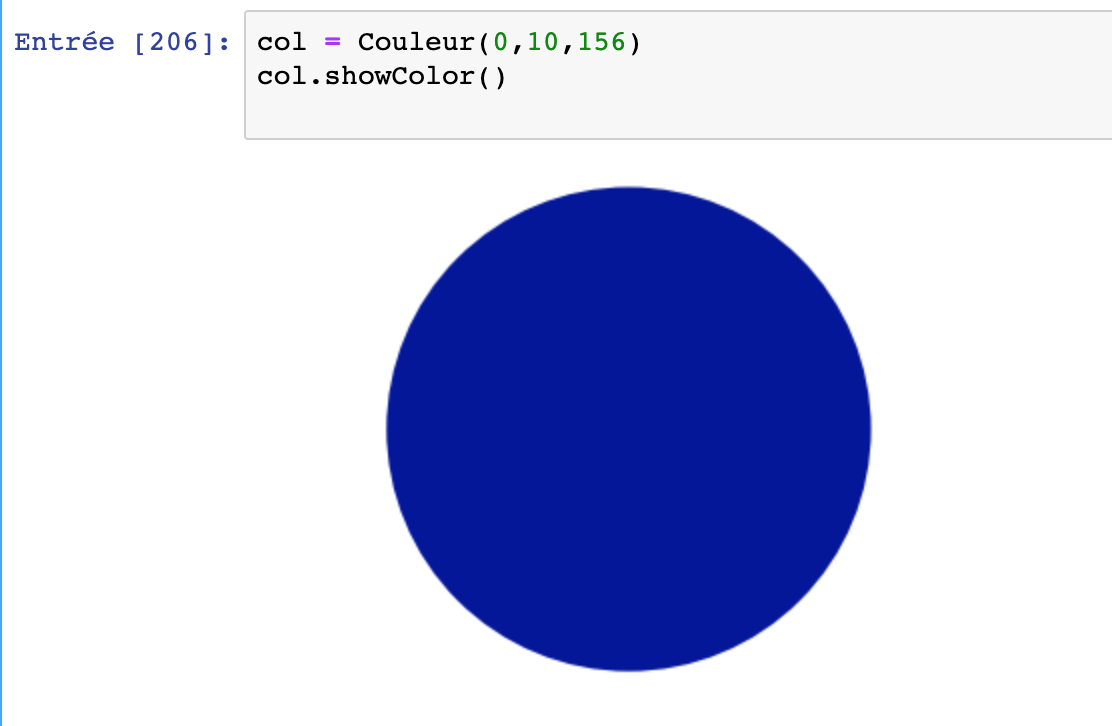

Creating color:
Red = 10
Green = 100
Blue = 100
Luminance = 73


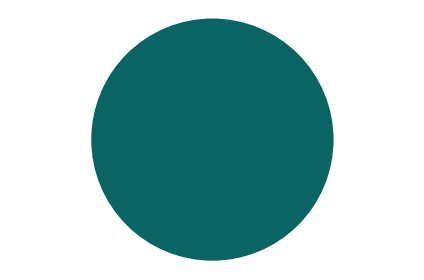

Brighter color:
Red = 15
Green = 150
Blue = 150
Luminance = 109


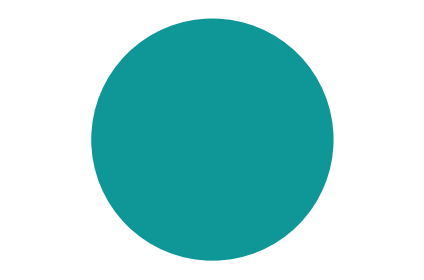

Darker color:
Red = 5
Green = 50
Blue = 50
Luminance = 36


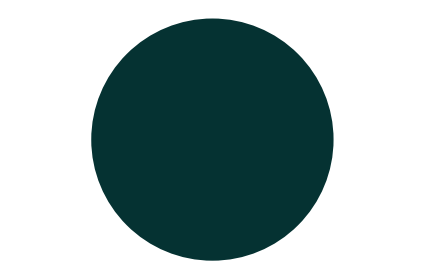

Gray Scale:
Red = 73
Green = 91
Blue = 86
Luminance = 85


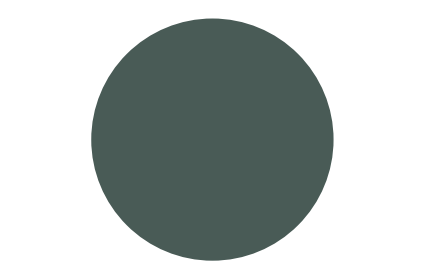

Adding colors:
Red = 20
Green = 200
Blue = 200
Luminance = 146


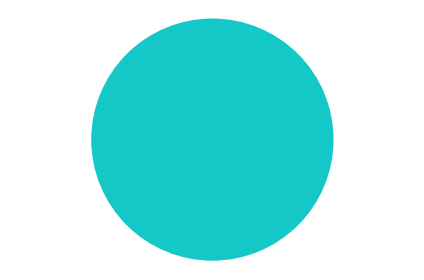

Compatible:
Equals:


False

In [97]:
print("Creating color:")
listeRGB= (10,100,100)
col = Couleur.creerCouleur(listeRGB)
Couleur.toString(col)
print("Luminance =",Couleur.luminance(col))
col.showColor()

print("Brighter color:")
colbrighter = Couleur.brighter(col,0.5)
Couleur.toString(colbrighter)
print("Luminance =", Couleur.luminance(colbrighter))
colbrighter.showColor()

print("Darker color:")
coldarker = Couleur.darker(col,0.5)
Couleur.toString(coldarker)
print("Luminance =", Couleur.luminance(coldarker))
coldarker.showColor()

print("Gray Scale:")
graycol= Couleur.grayScale(col)
Couleur.toString(graycol)
print("Luminance =", Couleur.luminance(graycol))
graycol.showColor()
 
print("Adding colors:")
newcolor = Couleur.add(colbrighter, coldarker)
Couleur.toString(newcolor)
print("Luminance =", Couleur.luminance(newcolor))
newcolor.showColor()

print("Compatible:")
Couleur.compatible(colbrighter, coldarker)

print("Equals:")
Couleur.equals(colbrighter, coldarker)


## Traitement d'image. 
Une image numérique est une grille rectangulaire de pixels (éléments d'image), où la couleur de chaque pixel est définie individuellement. Les images numériques sont parfois appelées images tramées ou bitmap. 
Le type de données Image vous permet de manipuler des images numériques. 

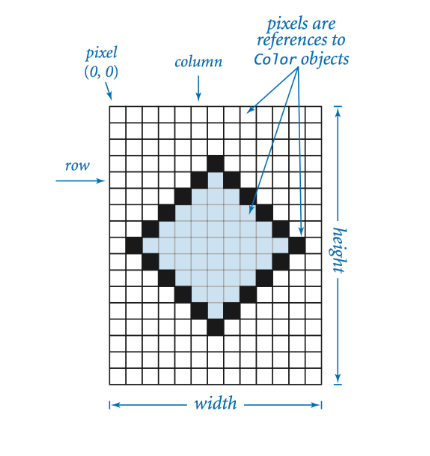
source: https://introcs.cs.princeton.edu/java/31datatype/

L'ensemble de valeurs est une matrice bidimensionnelle de valeurs de couleur, et les opérations sont celles auxquelles vous pouvez vous attendre: créer une image (vierge ou à partir d'un fichier), définir la valeur d'un pixel sur une couleur donnée et extraire la couleur d'un pixel donné. L'API suivante résume les opérations disponibles:

In [98]:
## Image Processing
class Picture:
    '''
    Creer une image à partir d'un fichier en utilisant la fonction imread() de matplotlig.image ou plus généralement la 
    librairie Pillow
    '''
    def __init__(self,nomFichier = None,H = None, W = None):
        if nomFichier == None:
                
            '''
            Creer une image blanche de hauteur H et de largeur W
            '''
            self.H = H
            self.W = W
            self.img = np.zeros((H,W,3), dtype = np.uint8) 
        else:
                
            '''
            Creer une image à partir d'un fichier
            '''
            self.img = mpimg.imread(nomFichier) 
            self.img = self.img[:,:,:3].copy()          #création d'une image à 3 plans
            self.img = (self.img*255).astype(np.uint8)  #np.uint8 image en 8octets
            self.H = self.img.shape[1] 
            self.W = self.img.shape[0]
        
    
    '''
    Retourne la hauteur H
    '''
    def getH(self):
        
        return self.H
    '''
    Retourne la largeur W
    '''
    def getW(self):
        
        return self.W
    '''
    Retourne le tableau numpy constituant l'image
    '''
    def getImg(self):
        
        return self.img
    
        '''
    Retourne les couleurs R,G, B sous forme de liste du pixel à la ligne row et la colonne col
    '''
    def getCouleur(self,row, col):
        
        liste = self.getImg()[row, col]
        return Couleur(liste[0], liste[1], liste[2])     
        
                                 
    '''
    Modifie les couleurs R,G,B du pixel à la ligne row et la colonne col
    '''
    def setCouleur(self,row, col,couleur):
        
        self.img[row, col] = [couleur.R, couleur.G, couleur.B]
        
        
        
        
    '''
    Affiche une image
    '''
    def affiche(self):
        plt.imshow(self.img)
        plt.axis("off")
        plt.show()
    '''
    Sauve  une image dans un fichier png
    '''
    def save(self, nomFichier):
        
        plt.imsave(nomFichier, self.img, format = 'png')
    
    
    
    

Affichage de l'image:


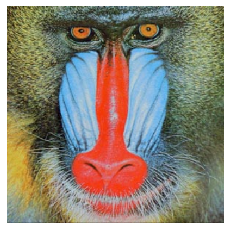

Les dimensions de l'image sont: Height = 399 et Width = 401
Couleur du pixel [90,100]:
Red = 98
Green = 115
Blue = 97


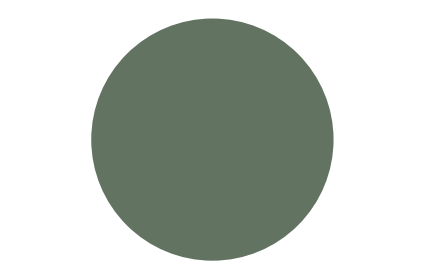

Modification de la couleur du pixel[90,100]:
Red = 10
Green = 10
Blue = 100


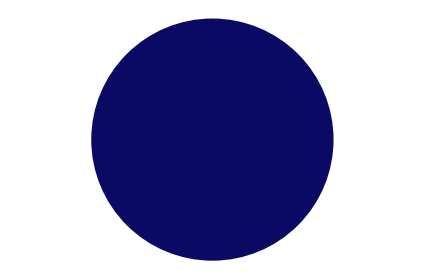

In [99]:
print("Affichage de l'image:")
picture=Picture("mandrill.png")
picture.affiche()
print("Les dimensions de l'image sont: Height = {} et Width = {}".format(picture.getH(), picture.getW()))

print("Couleur du pixel [90,100]:")
picture.getImg()[90,100]
pix = picture.getCouleur(90,100)
pix.toString()
pix.showColor()
print("Modification de la couleur du pixel[90,100]:")
col = Couleur(10,10,100)
picture.setCouleur(90, 100, col)
colmodifie = picture.getCouleur(90,100)
colmodifie.toString()
colmodifie.showColor()


## Convertir une image couleur en grayscale
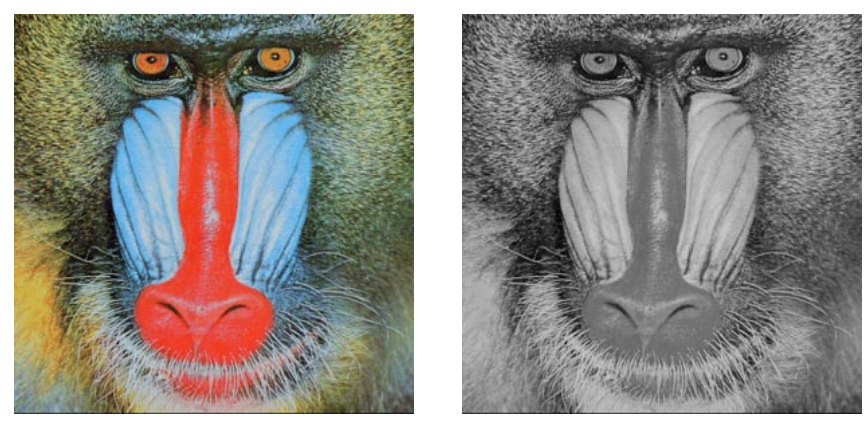



## Changer l'échelle d'une image en inversant la hauteur et la largeur en gardant les mêmes proportions
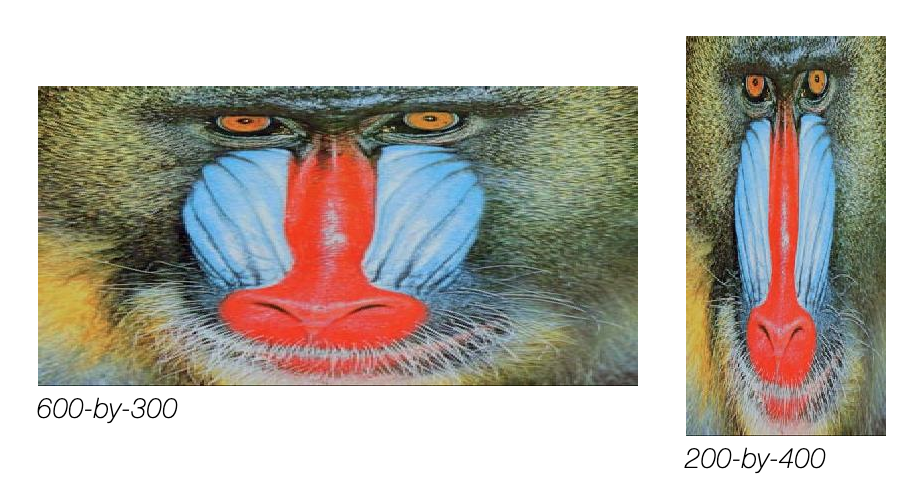



## Separation de couleurs
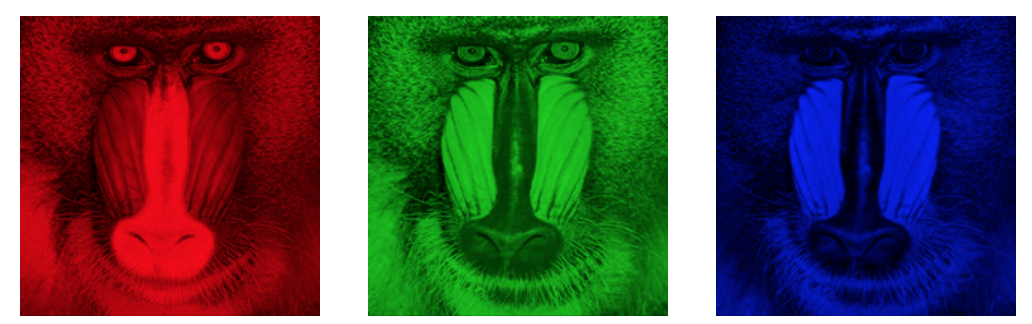

## Glass Filter
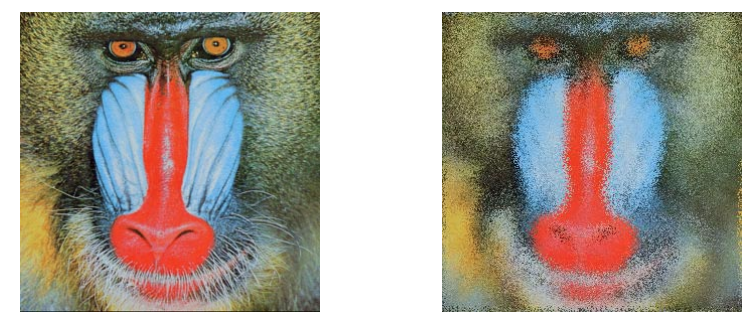

In [100]:
## Image processing
class ImageProcessing:
    
    def __init__(self,image):
        self.image = image
    '''
    Helper function
    '''
    def __calGray__(listePixel):
        A = math.floor(0.299*listePixel[0] + 0.587*listePixel[1] + 0.114*listePixel[2])
        return np.ndarray([A,A,A])
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Appliquer les fonctions map, reduce ou filter pour reduire la complexite
    '''
    def transformGrayscaleMap(self):
        
        grayPicture = Picture(None,self.image.W,self.image.H)
        grayPicture.image = map(self.__calGray__,self.image.img[:,:])
        return grayPicture        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Une classe gloutonne avec des boucles for
    '''
    def transformGrayscaleGlouton(self):
        
        picture = self.image
        width = picture.getW()
        height = picture.getH()
        graycol = Picture(None,width, height)
        
        for col in range(width):
            for row in range(height):
                color = picture.getCouleur(col, row)
                color.grayScale()
                graycol.setCouleur(col, row, color)
                
        picture.affiche()
        graycol.affiche()
        
                 
        
    '''
     Creer une image en inversant les proportions de l'image source. Afficher les deux images
    '''
    def transformScale(self):
        
        sourceImg = self.image
        width  = sourceImg.getH()
        height = sourceImg.getW()
        renverser = Picture(None, width, height)
        
        for colrenverser in range(width):
            for rowrenverser in range(height):
                sourceImgCol = colrenverser * height  / width
                sourceImgRow = rowrenverser * width / height
                color = sourceImg.getCouleur(int(sourceImgCol), int(sourceImgRow))
                renverser.setCouleur(colrenverser, rowrenverser, color)
                
        sourceImg.affiche()
        renverser.affiche()
        
    '''
    Separer les couleurs d'une image et visualiser les trois couleurs
    '''
    def separerCouleur(self):
        
        picture = self.image
        width  = picture.getW()
        height = picture.getH()
        Rpicture = Picture(None, width, height)
        Gpicture = Picture(None, width, height)
        Bpicture = Picture(None, width, height)
        
        for col in range(width): 
            for row in range(height):
                color = picture.getCouleur(col, row)
                red = color.getR()
                green = color.getG()
                blue = color.getB()
                Rpicture.setCouleur(col, row, Couleur(red, 0, 0))
                Gpicture.setCouleur(col, row, Couleur(0, green, 0))
                Bpicture.setCouleur(col, row, Couleur(0, 0, blue))
                
        Rpicture.affiche()
        Gpicture.affiche()
        Bpicture.affiche()
        
    '''
    Filtre de glace: Affecter à chaque pixel p la couleur d'un pixel voisin choisi alétoirement
    (Les coordonnées du pixel et de p doivent différer d'au plus 5).
    Afficher les deux images 
    '''
    def filtreGlass(self):
        
        picture = self.image
        width  = picture.getW()
        height = picture.getH()
        glassImg = Picture(None,width, height)
        
        for col in range(width):
            for row in range(height):
                colglass = (width  + col + random.randint(-5, 5)) % width
                rowglass = (height + row + random.randint(-5, 5)) % height
                color = picture.getCouleur(colglass, rowglass)
                glassImg.setCouleur(col, row, color)
                
        picture.affiche()
        glassImg.affiche()

Image grisée:


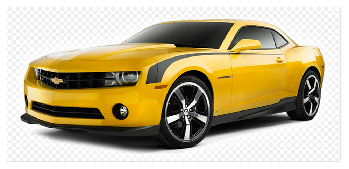

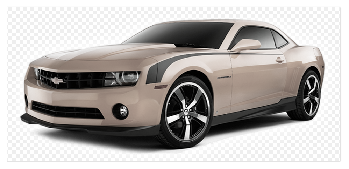

In [104]:
picture=Picture("voiture.png")
image = ImageProcessing(picture)
print("Image grisée:")
image.transformGrayscaleGlouton()

Redimensionnement de l'image:


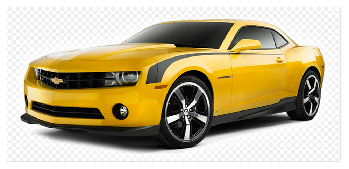

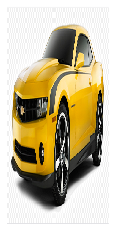

In [106]:
print("Redimensionnement de l'image:")
image.transformScale()

Séparation des couleurs:


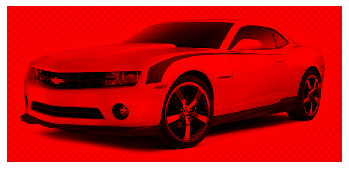

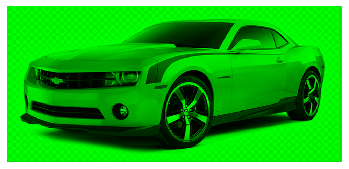

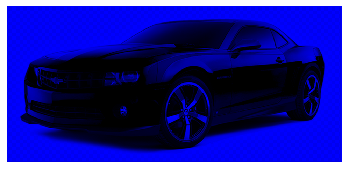

In [103]:
print("Séparation des couleurs:")
image.separerCouleur()

Filtre de l'image:


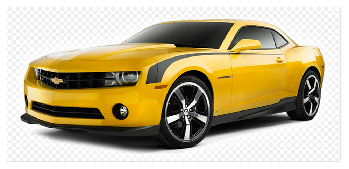

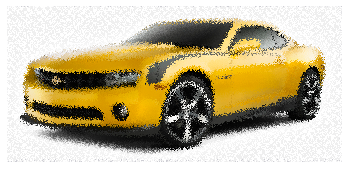

In [95]:
print("Filtre de l'image:")
image.filtreGlass()